# Solution part 2

In [3]:
import pandas as pd
import seaborn as sns

### Read the World Happiness data from an Excel file into a dataframe 

In [4]:
wh_file = 'WHR20_DataForTable2.1.xls'
wh_all_df = pd.read_excel(wh_file)

#### Display the content of the dataframe

In [5]:
wh_all_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,Zimbabwe,2015,3.703191,7.827643,0.735800,53.799999,0.667193,-0.117035,0.810457,0.715079,...,NaN,0.432,0.655137,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1844,Zimbabwe,2016,3.735400,7.819675,0.768425,54.400002,0.732971,-0.088488,0.723612,0.737636,...,NaN,0.432,0.596690,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1845,Zimbabwe,2017,3.638300,7.851042,0.754147,55.000000,0.752826,-0.091540,0.751208,0.806428,...,NaN,0.432,0.581484,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1846,Zimbabwe,2018,3.616480,7.896704,0.775388,55.599998,0.762675,-0.063282,0.844209,0.710119,...,NaN,0.432,0.541772,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


### Extract the columns of interest

In [6]:
wh_all_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-2017, unbalanced panel',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most peopl

In [9]:
cols_selec = wh_all_df.columns[1:9]
cols_selec

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption'],
      dtype='object')

In [10]:
wh_withna_df = wh_all_df[cols_selec]

### Display pairwise scatter plots

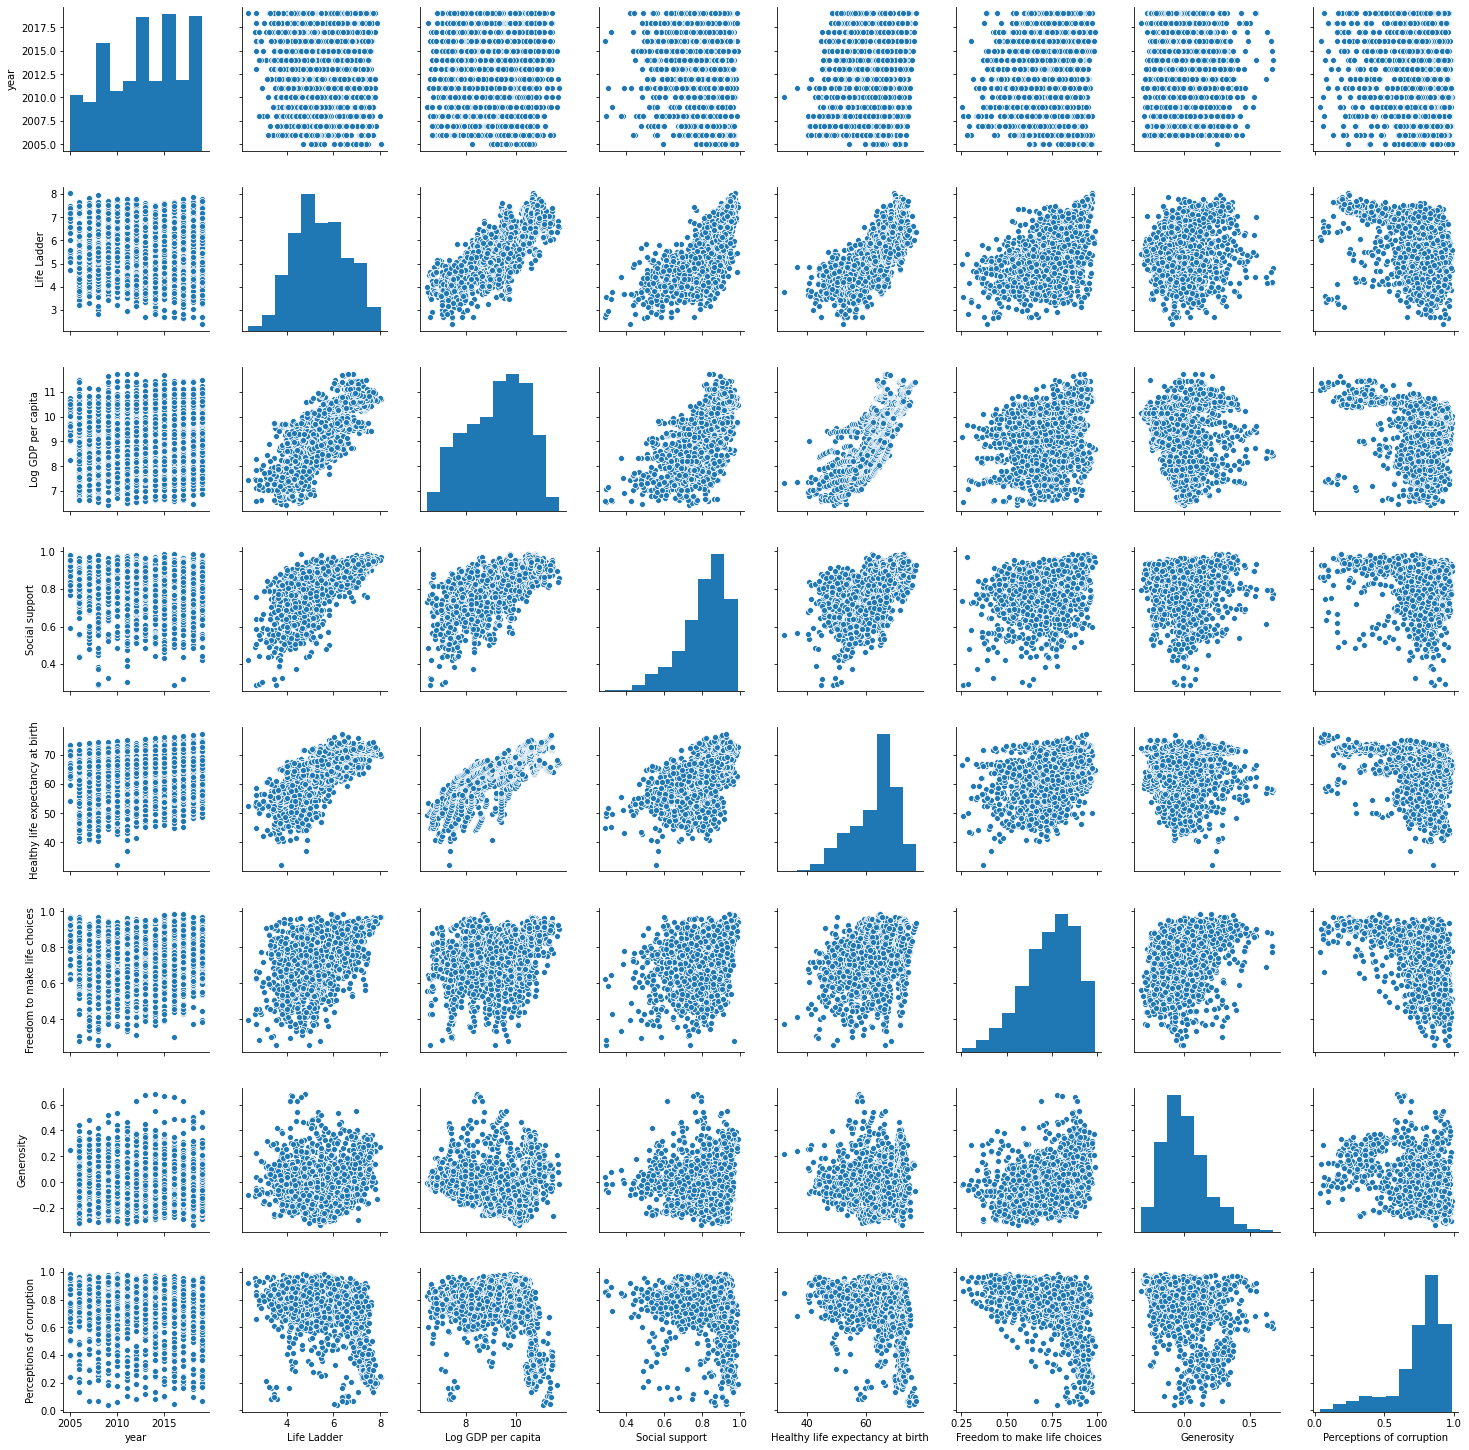

In [11]:
sns.pairplot(wh_withna_df);

#### Bonus: heatmap with annotation via the correlation matrix

In [ ]:
wh_corrmat = wh_withna_df.corr()
wh_corrmat

In [ ]:
sns.heatmap(wh_corrmat, cmap='coolwarm', vmin=-1, vmax=1, annot=True);

### Count missing values

In [12]:
wh_withna_df.isna().sum()

year                                  0
Life Ladder                           0
Log GDP per capita                   29
Social support                       13
Healthy life expectancy at birth     52
Freedom to make life choices         31
Generosity                           83
Perceptions of corruption           103
dtype: int64

### Remove missing values

In [13]:
wh_df = wh_withna_df.dropna()

#### Count number of rows removed

In [14]:
n_drops = wh_withna_df.shape[0] - wh_df.shape[0]
n_drops_pc = n_drops / wh_df.shape[0] * 100
print(f"Number of rows removed: {n_drops}, that is {n_drops_pc:.2f}%")

Number of rows removed: 221, that is 13.58%
